In [47]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import re

In [48]:
from konlpy.tag import Okt, Kkma
from collections import Counter

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [50]:
# 블로그 본문 데이터프레임에 Spot열 만들어서 장소 붙이기
review = pd.read_csv('../관광지_리뷰.csv')
spots = list(review[review['Region'] == '인천'].Spots)

In [51]:
# 장소컬럼까지 붙인 파일 불러오기
df = pd.read_csv('../result_blog/인천(장소포함).csv')

In [52]:
df.drop(columns = 'Unnamed: 0', inplace=True)

In [53]:
df.columns

Index(['Texts', 'Spots'], dtype='object')

In [54]:
place = pd.read_csv('../관광지_선정.csv')
인천_여행지 = list(place[place['Region']=='인천']['Spots'])

In [55]:
인천_여행지

['인천차이나타운', '송월동동화마을', '인천대공원', '월미테마파크', '월미도']

In [56]:
# 한국어_불용어_목록
sw = pd.read_csv('../데이터/한국어_불용어_목록.csv')

In [57]:
# 이모지 제외하고 나머지만 추출하기
def txt_without_emoji(df,spot):
    contents = list(df[df.Spots==spot].Texts)
    contents =  ' '.join(str(item) for item in contents)
    cleaned_text = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣a-zA-Z0-9\s]', '', contents)
    return cleaned_text

In [58]:
def top_words(texts):
    okt=Okt()
    nouns = okt.nouns(texts)
    nouns2 = [word for word in nouns if len(word) > 1]
    kor_sw = list(np.hstack(sw.values))
    nouns3 = [noun for noun in nouns2 if noun not in kor_sw]
    nouns_cnt = Counter(nouns3)
    tokens_df = pd.DataFrame(pd.Series(nouns_cnt), columns=['Freq'])
    sorted_df = tokens_df.sort_values(by='Freq',ascending=False)
    top_df = sorted_df.iloc[:20]
    sns.barplot(data = top_df, x='Freq', y= top_df.index)
    plt.title('상위20개 단어빈도')
    plt.show()

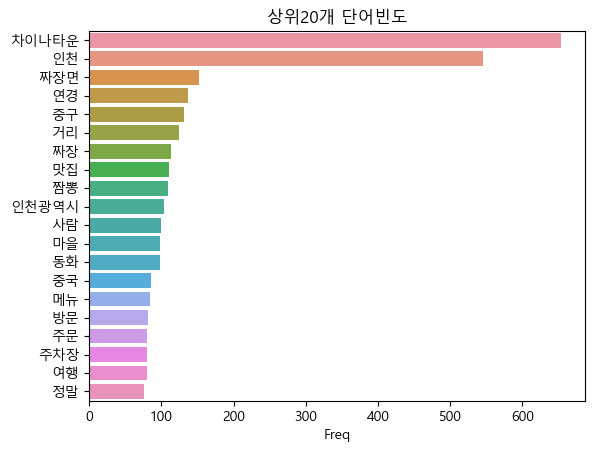

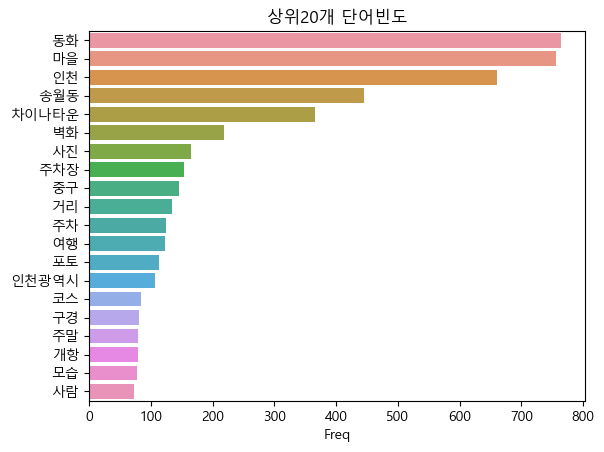

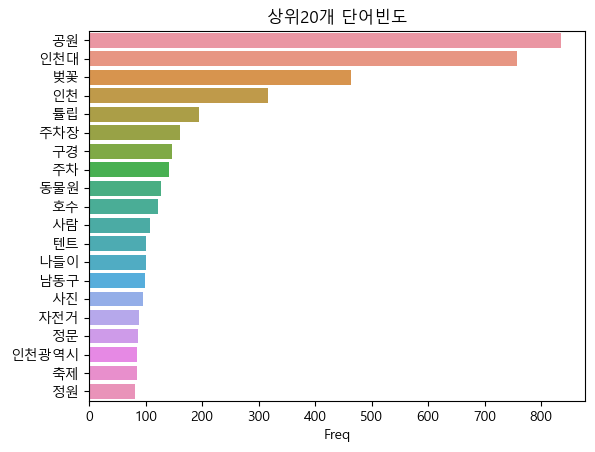

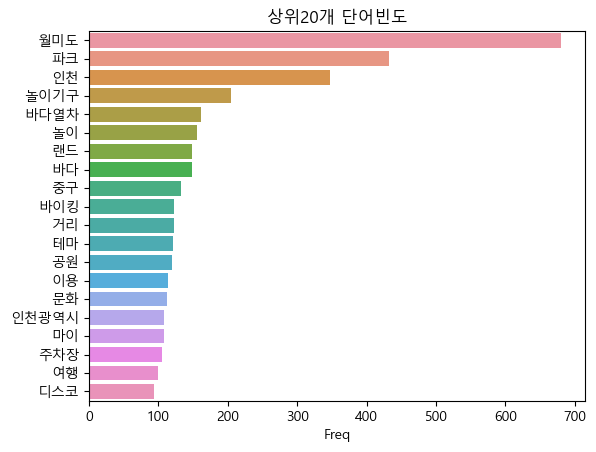

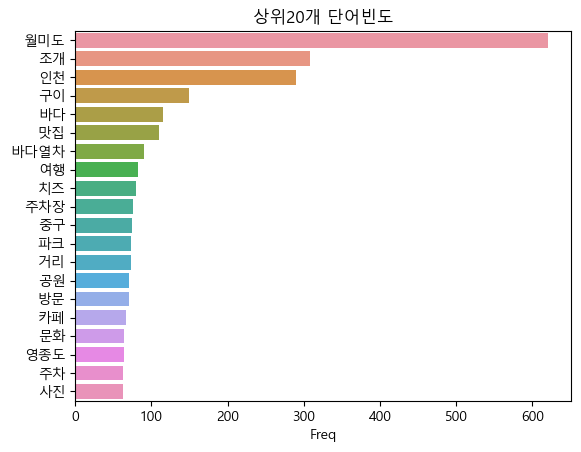

In [60]:
#['인천차이나타운', '송월동동화마을', '인천대공원', '월미테마파크', '월미도']
for spot in 인천_여행지:
    texts = txt_without_emoji(df,spot)
    top_words(texts)

In [22]:
# 워드클라우드
def wordcloud(df,spot):
    texts = txt_without_emoji(df,spot)
    font_path = 'C:/Windows/Fonts/malgun.ttf'
    wordcloud = WordCloud(background_color='white', font_path=font_path).generate(texts)
    
    plt.axis('off')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.title(spot)
    plt.show()

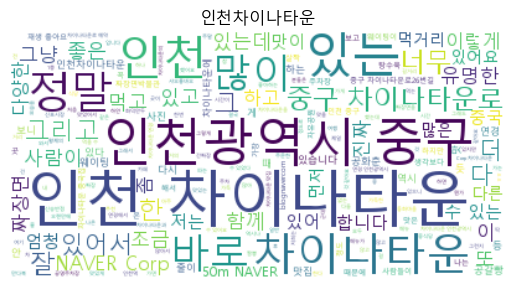

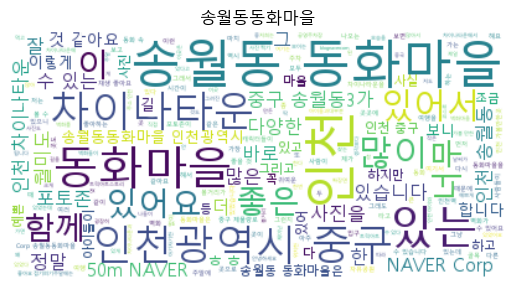

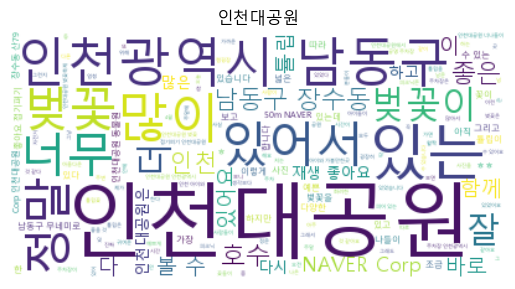

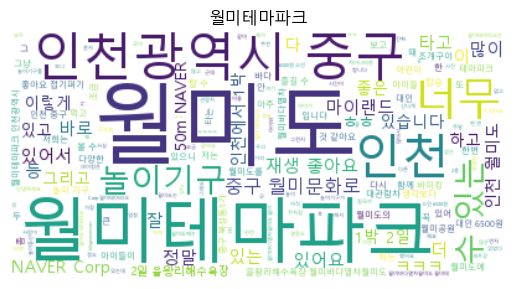

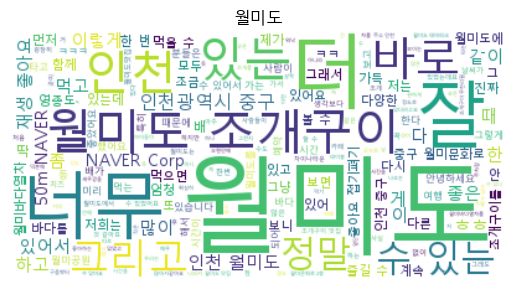

In [23]:
# ['인천차이나타운', '송월동동화마을', '인천대공원', '월미테마파크', '월미도']
for spot in 인천_여행지:
    wordcloud(df,spot)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [25]:
# 관광지명 
place = pd.read_csv('../관광지_리뷰.csv')
spots = list(place[place['Region']=='인천']['Spots'])

In [26]:
# 여행지별 본문 내용을 하나로 합치기
contents = []
for spot in spots:
    texts = txt_without_emoji(df,spot)
    contents.append(list(texts))

In [27]:
#각 여행지별 텍스트를 데이터로 갖는 데이터프레임 생성
def df_75(contents):
    data = []
    for i in range(75):
        c = ''.join(contents[i])
        data.append([c])
    df = pd.DataFrame(data,columns = ['contents'])
    return df


In [28]:
contents_df = df_75(contents)
contents_df

,contents
0,벚꽃날리던 4월의 봄\n인천대공원 캠핑장 1박2일 봄캠핑\n너나들이 캠핑장 자가텐트...
1,인천 을왕리 맛집 치즈조개구이 을왕리 해수욕장 맛집\n인천 을왕리 맛집 치즈조개구이...
2,인천차이나타운 연경 메뉴 추천\n인천여행하면 꼭 가봐야할 곳이\n차이나타운인것 같아...
3,교동대룡리시장\n인천광역시 강화군 교동면 교동남로 35\n친정에 왔다가 급으로 가게...
4,꽃 피기 전 3월 토요일 석모도로 나섰다\n어디로 갈까 고민하다 나선 석모도\n강화...
...,...
70,최근 강화도 당일치기 여행을 다녀왔어요\n이번에 본 관광지 중에 용흥궁 공원에 있던...
71,안녕하세요 단호박입니다\n어제에 이어 오늘도 만보 걷기 달성하고 왔어요\n어제는 날...
72,안녕하세요퓨류아입니다\n오늘은 인천에 영흥도를 다녀왔어요\n한 시간 반 거리긴 한데...
73,등린이 추천 일출 산행지\n360도 파노라마 뷰\n경기 이천 원적산\n지난해 6월 ...


In [29]:
# contents_df에 spots 열 추가하기
contents_df['spots'] = spots

In [30]:
contents_df

,contents,spots
0,벚꽃날리던 4월의 봄\n인천대공원 캠핑장 1박2일 봄캠핑\n너나들이 캠핑장 자가텐트...,인천대공원
1,인천 을왕리 맛집 치즈조개구이 을왕리 해수욕장 맛집\n인천 을왕리 맛집 치즈조개구이...,을왕리해수욕장
2,인천차이나타운 연경 메뉴 추천\n인천여행하면 꼭 가봐야할 곳이\n차이나타운인것 같아...,인천차이나타운
3,교동대룡리시장\n인천광역시 강화군 교동면 교동남로 35\n친정에 왔다가 급으로 가게...,화개정원
4,꽃 피기 전 3월 토요일 석모도로 나섰다\n어디로 갈까 고민하다 나선 석모도\n강화...,석모도미네랄온천
...,...,...
70,최근 강화도 당일치기 여행을 다녀왔어요\n이번에 본 관광지 중에 용흥궁 공원에 있던...,용흥궁
71,안녕하세요 단호박입니다\n어제에 이어 오늘도 만보 걷기 달성하고 왔어요\n어제는 날...,계양산장미원
72,안녕하세요퓨류아입니다\n오늘은 인천에 영흥도를 다녀왔어요\n한 시간 반 거리긴 한데...,영흥도 하늘고래공원전망대
73,등린이 추천 일출 산행지\n360도 파노라마 뷰\n경기 이천 원적산\n지난해 6월 ...,원적산


In [31]:
# tfidf
tfidf = TfidfVectorizer()
ftr_mat1 = tfidf.fit_transform(contents_df['contents'])

In [32]:
# 유사도 검사
cosine_sim = cosine_similarity(ftr_mat1, ftr_mat1)
cosine_sim

array([[1.        , 0.09458963, 0.09637223, ..., 0.0714525 , 0.05638928,
        0.0622616 ],
       [0.09458963, 1.        , 0.15342868, ..., 0.10359948, 0.05600436,
        0.07036951],
       [0.09637223, 0.15342868, 1.        , ..., 0.08514962, 0.04831129,
        0.06693858],
       ...,
       [0.0714525 , 0.10359948, 0.08514962, ..., 1.        , 0.04338829,
        0.08095922],
       [0.05638928, 0.05600436, 0.04831129, ..., 0.04338829, 1.        ,
        0.03923057],
       [0.0622616 , 0.07036951, 0.06693858, ..., 0.08095922, 0.03923057,
        1.        ]])

In [33]:
# 여행지와 인덱스 사전 만들기
title_to_index = dict(zip(contents_df['spots'], contents_df.index))
title_to_index['인천대공원']

0

In [34]:
# 유사도 높은 여행지 추출
def get_recommend(place, cosine_sim, n=10):
    idx = title_to_index[place]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores_top = sorted(sim_scores, key=lambda x:x[1], reverse=True)[1:n+1] 
    indices = [item[0] for item in sim_scores_top]
    return contents_df['spots'].iloc[indices]

In [36]:
# ['인천차이나타운', '송월동동화마을', '인천대공원', '월미테마파크', '월미도']
get_recommend('인천차이나타운',cosine_sim)

35    송월동동화마을
5         월미도
28     월미테마파크
10        영종도
12        강화도
1     을왕리해수욕장
17      마시안해변
25     왕산해수욕장
9         무의도
6     하나개해수욕장
Name: spots, dtype: object

In [37]:
get_recommend('송월동동화마을',cosine_sim)

2      인천차이나타운
5          월미도
28      월미테마파크
10         영종도
1      을왕리해수욕장
12         강화도
9          무의도
39    선녀바위해수욕장
6      하나개해수욕장
17       마시안해변
Name: spots, dtype: object

In [38]:
get_recommend('인천대공원',cosine_sim)

53     인천대공원 어린이동물원
41              소래산
22         소래습지생태공원
12              강화도
65              원인재
13           경인아라뱃길
15    SK인천석유화학 벚꽃동산
10              영종도
35          송월동동화마을
5               월미도
Name: spots, dtype: object

In [39]:
get_recommend('월미테마파크',cosine_sim)

5          월미도
35     송월동동화마을
2      인천차이나타운
1      을왕리해수욕장
10         영종도
17       마시안해변
25      왕산해수욕장
39    선녀바위해수욕장
9          무의도
48        선녀바위
Name: spots, dtype: object

In [40]:
get_recommend('월미도',cosine_sim)

28     월미테마파크
10        영종도
2     인천차이나타운
17      마시안해변
1     을왕리해수욕장
25     왕산해수욕장
35    송월동동화마을
12        강화도
7      동막해수욕장
9         무의도
Name: spots, dtype: object

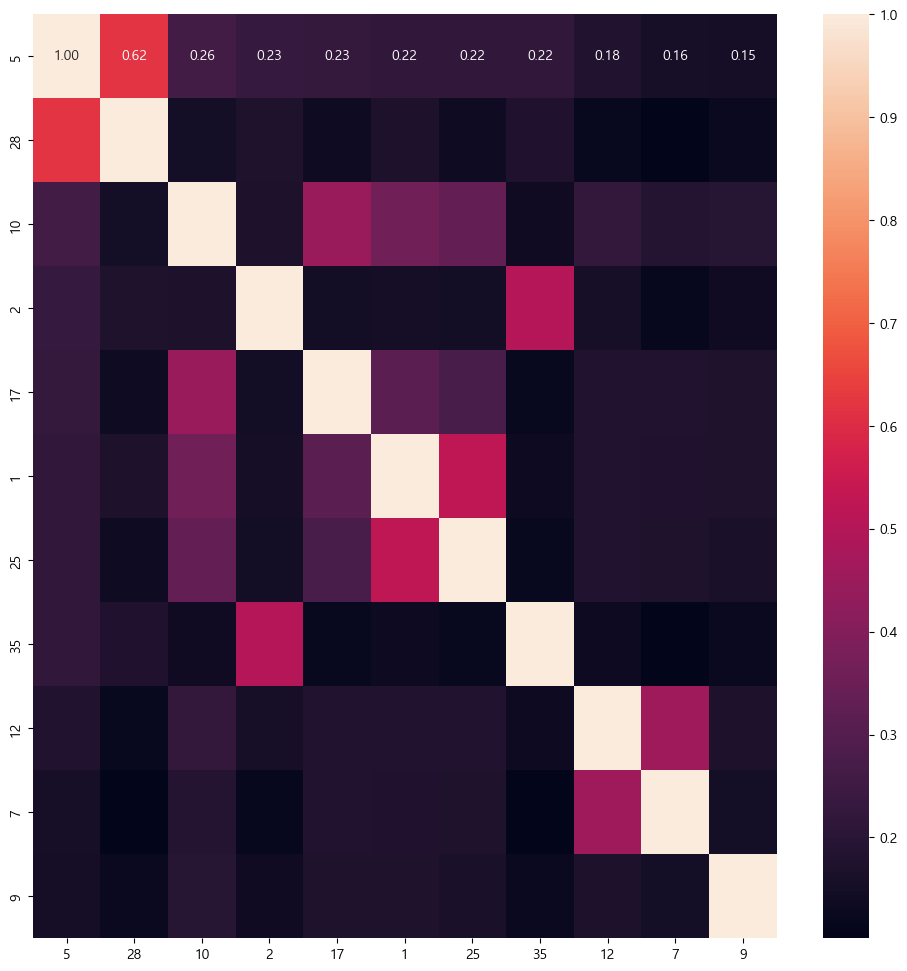

In [41]:
place = '월미도'
n=10
sel_idx = title_to_index[place]

top_n_idx = get_recommend(place, cosine_sim,n).index

place_idx = [sel_idx] + list(top_n_idx)
place_idx
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])

plt.figure(figsize=(12,12))
sns.heatmap(cos_sim, annot=True, fmt='.2f', xticklabels=place_idx, yticklabels=place_idx)
plt.show()

In [42]:
# 데이터프레임으로 만들기
place = '월미도'
n=10
sel_idx = title_to_index[place]

place_info = get_recommend(place, cosine_sim, n)
spot = place_info.values
place_idx = [sel_idx] + list(place_info.index)
cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])
sim = cos_sim[0][1:]

df = pd.DataFrame(sim, index=spot, columns=['similarity'])
df

,similarity
월미테마파크,0.620455
영종도,0.261188
인천차이나타운,0.229351
마시안해변,0.225919
을왕리해수욕장,0.220664
왕산해수욕장,0.218779
송월동동화마을,0.217937
강화도,0.181282
동막해수욕장,0.157858
무의도,0.151128


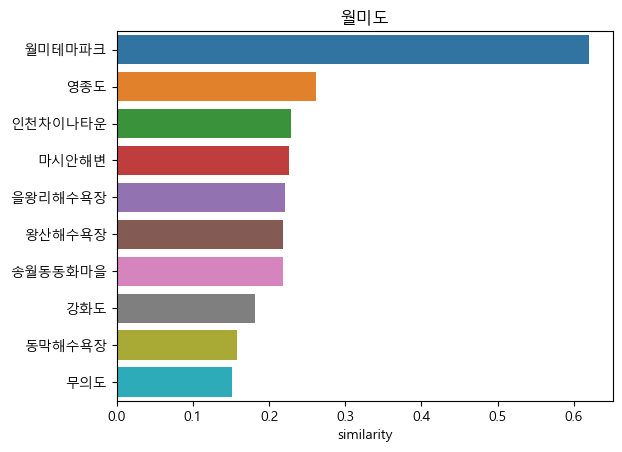

In [43]:
sns.barplot(data = df, x='similarity', y=df.index)
plt.title(f'{place}')
plt.show()

In [44]:
# 데이터프레임으로 만들기
def barplot(place):
    n=10
    sel_idx = title_to_index[place]
    
    place_info = get_recommend(place, cosine_sim, n)
    spot = place_info.values
    place_idx = [sel_idx] + list(place_info.index)
    cos_sim = cosine_similarity(ftr_mat1[place_idx], ftr_mat1[place_idx])
    sim = cos_sim[0][1:]
    
    df = pd.DataFrame(sim, index=spot, columns=['similarity'])
    sns.barplot(data = df, x='similarity', y=df.index)
    plt.title(f'{place}')
    plt.show()

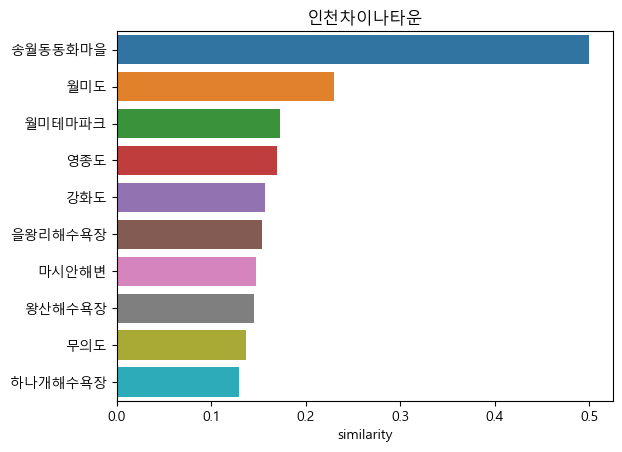

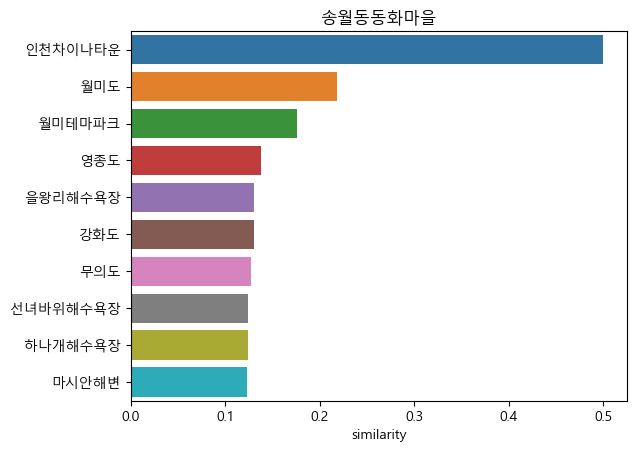

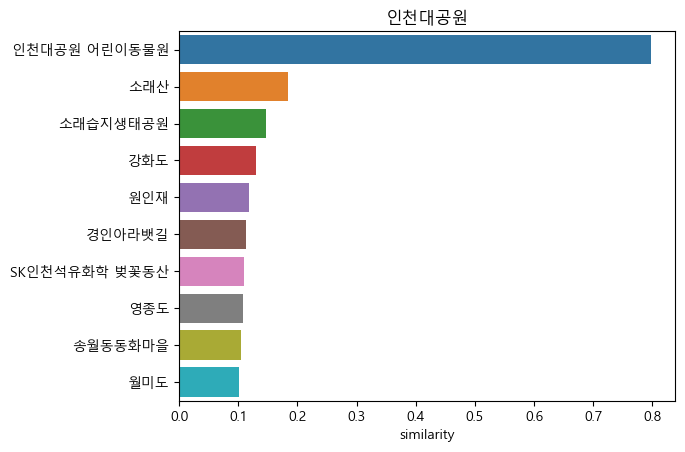

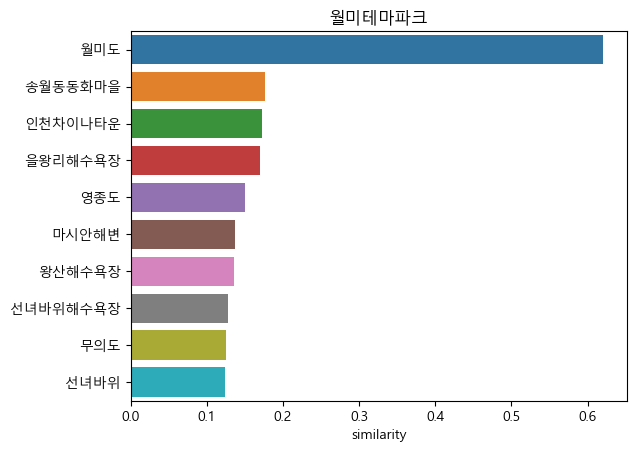

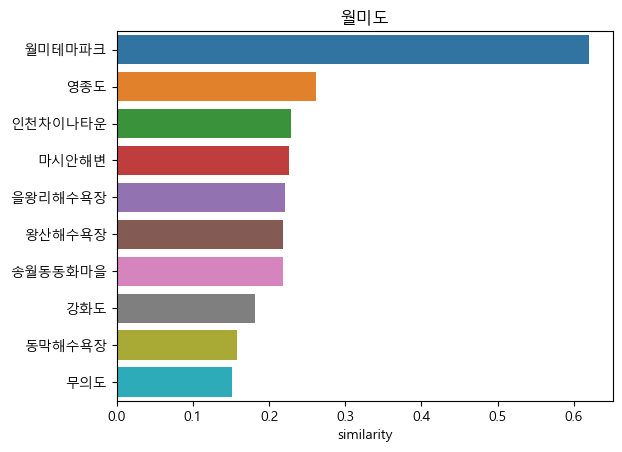

In [46]:
for spot in 인천_여행지:
    barplot(spot)